## Master in Artificial Intelligence, UdC, USC, UVigo. 2025/2026
## COMPUTER VISION I

### Topic 4: Image Segmentation
### Part 1: intensity-based thresholding and clustering (0.80 pts.)
Remember: digital images are just two-dimensional data.
To segment a certain type of images,
we always need some prior knowledge of the information
that is available in the data. Here, we assume that the useful information
is given by more or less similar gray values and that the foreground
consist of typical objects as seen in out daily live.

Make sure the path to the image file meets your needs on your system.

In [1]:
images_path = './images/'

We import everything at the beginning, as the libs are needed later...

In [4]:
import cv2
import sys
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy.stats import norm
from sklearn.cluster import DBSCAN

We instruct matplotlib to show gridlines in the visualization of
two-dimensional data (maybe this is already the default in your
environment).
Decide by yourself whether you like them to be displayed.

In [5]:
plt.rcParams.update({"axes.grid" : True})

#### Histogram thresholding

**Exercise 1:**
Read and visualize 'plates.png', and:
1. Calculate its histogram, and visualize it using matplotlib and pyplot
(1_intro_CV notebook).
1. Do the same using the “seaborn” package.
1. Compute a smoothed version of the histogram by using a kernel density
estimation (KDE) from the “seaborn” package.

**Key Concepts**

***Histogram***:
Graphical representation of the distribution of pixel intensities in an image.

Since the appearance of a histogram depends on the number of bins chosen,
it can sometimes look too irregular.
**KDE (Kernel Density Estimation)** offers a smoother,
continuous representation of the data distribution by placing a kernel
(usually a Gaussian function) on each data point and summing them,
hence, producing a continuous estimate of the probability density
instead of the blocky/stairy appearance of a histogram.

*More information about KDE: https://mathisonian.github.io/kde/*


We read the image (here the image of two plates)
and check whether the file could be handled.

In [6]:
img = cv2.imread(images_path + 'plates.png', cv2.IMREAD_GRAYSCALE)
if img is None:
  sys.exit('Input image not found, check the path')

Show image resolution.

In [7]:
img.shape

(357, 407)

You might want to display the image with cv2,
and close the image when done
(depending on your environment this OpenCV visualization might not work
nicely in the jupyter notebook).

In [ ]:
#cv2.imshow('image', img)
#k = cv2.waitKey(0)

or display it here with pyplot

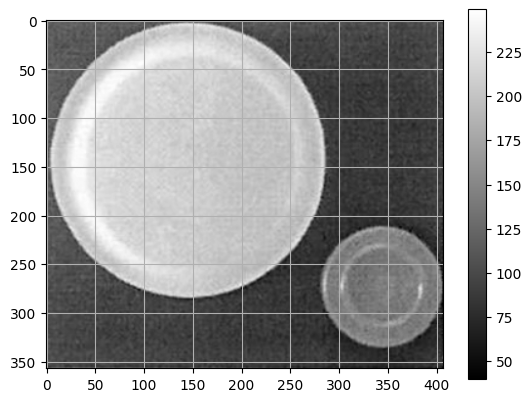

In [8]:
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

1. Calculate the histogram and visualize it using matplotlib and pyplot.

```
usage: matplotlib.pyplot.hist(
         x, bins=None, range=None, density=False, weights=None,
         cumulative=False, bottom=None, histtype='bar', align='mid',
         orientation='vertical', rwidth=None, log=False, color=None,
         label=None, stacked=False, *, data=None, **kwargs
      )
```

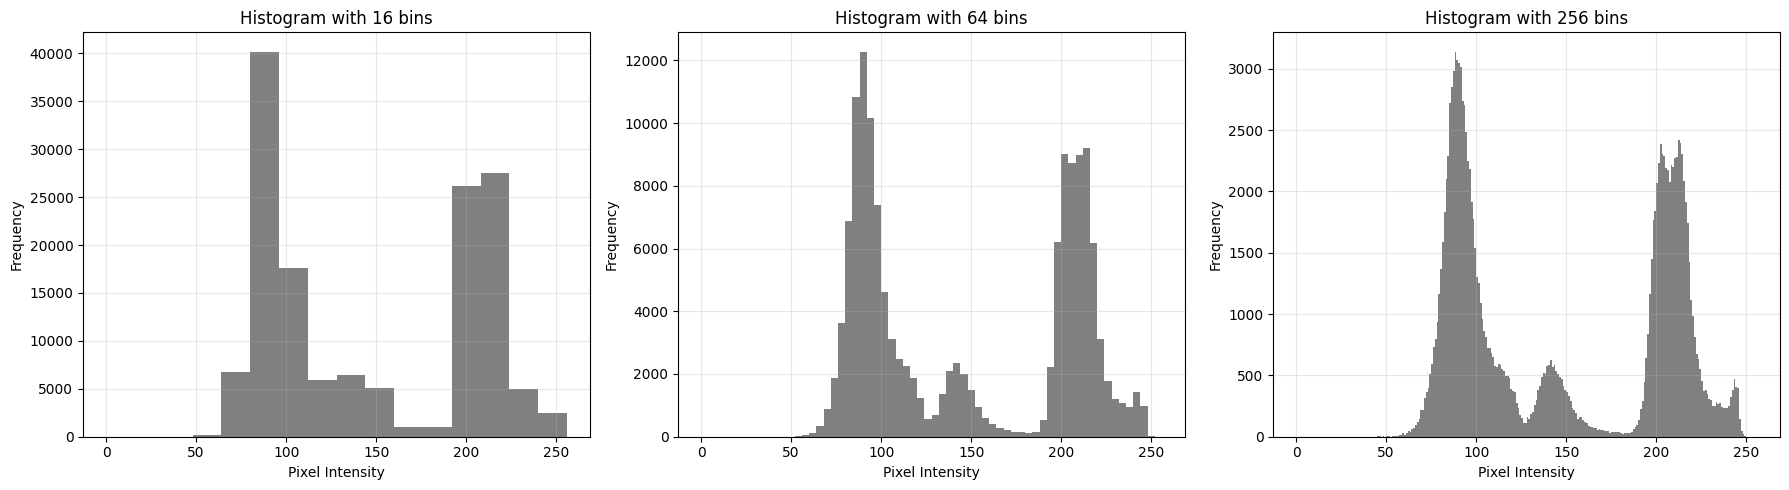

In [ ]:
# Visualize the histogram with matplotlib 
# - Try at least 2 more different values for 'bins' (for example, 16, 64, 256)
# - Comment on how the appearance of the histogram changes when varying 'bins.

bin_sizes = [16, 64, 256]

plt.figure(figsize=(18, 5))

for i, bins in enumerate(bin_sizes):
    plt.subplot(1, 3, i + 1)
    plt.hist(img.reshape(-1), bins=bins, range=[0, 256], color='gray')
    plt.title(f'Histogram with {bins} bins')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# a higher ammount of bins creates a smoother transition between each step. in the case of 256 bins we have exactly one bin 
# for each greyscale value. the height of each peak decreases with a higher bin count, as we have more bins to distrbute the values. 

2. Do the same using the “seaborn” package.

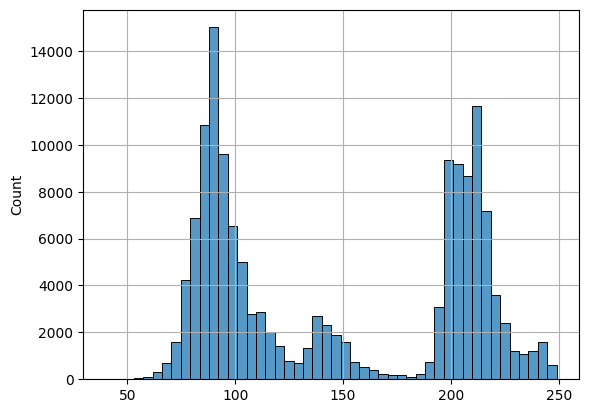

In [13]:
sns.histplot(img.reshape(-1))
plt.show()

3. Compute a smoothed version of the histogram using KDE from the
“seaborn” package.

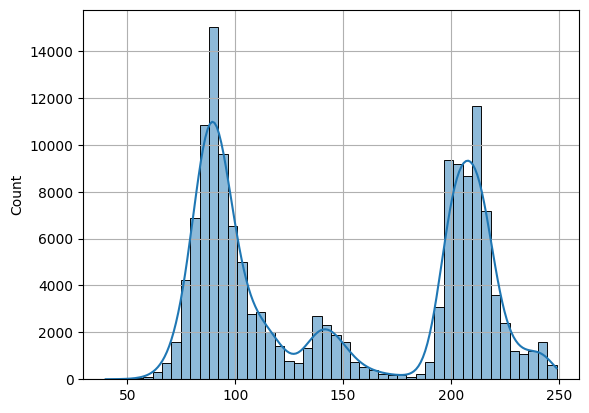

In [14]:
sns.histplot(img.reshape(-1), kde=True)
plt.show()

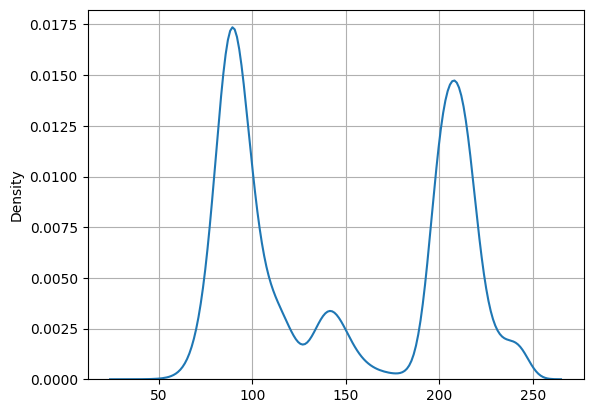

In [15]:
sns.kdeplot(img.reshape(-1))       # only kde
plt.show()

**Exercise 2 (0.05 pts):**
Apply multilevel thresholding to 'plates.png'.
1. What is the optimal number of levels?
1. How does the histogram change?

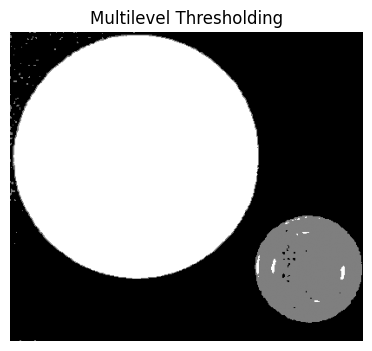

In [19]:

thresholded_img = img.copy()

# Choose your thresholds and class values based on the histogram.
# Replace the with your own values.

# Example for 3 levels (you may change the number of levels):
# Class 1: img < T1        -> V1
# Class 2: T1 <= img < T2  -> V2
# Class 3: img >= T2       -> V3

# T: Threshold
# V: Value

# --- STEP 1: DEFINE THRESHOLDS AND VALUES ---
T1 = 125   
T2 = 175

# Define the output gray values for each class (e.g., Black, Gray, White)
V1 = 0    # Black
V2 = 127  # Gray
V3 = 255  # White

mask1 = img < T1
mask2 = (img >= T1) & (img < T2)
mask3 = img >= T2

thresholded_img[mask1] = V1
thresholded_img[mask2] = V2
thresholded_img[mask3] = V3

plt.figure(figsize=(10, 5))

# Show the result
plt.subplot(1, 2, 1)
plt.imshow(thresholded_img, cmap='gray')
plt.title('Multilevel Thresholding')
plt.axis('off')

plt.show()


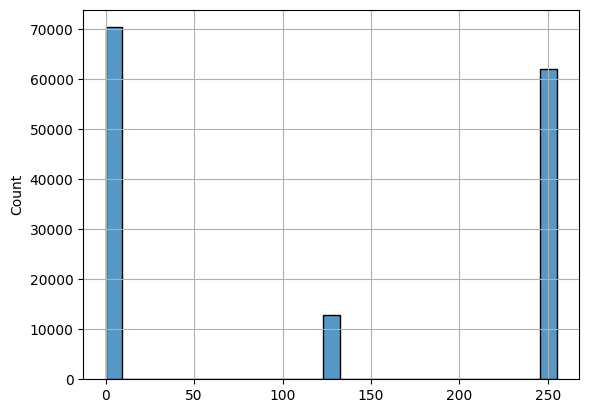

In [18]:
sns.histplot(thresholded_img.reshape(-1))
plt.show()

1. The optimal ammount of levels depends on the "peaks" we find in the original histogram. In the paltes image we could have only 2 values, where we would distinguish the plates from the background. we could have 3 levels as well as demonstrated in the image above, where we could distinguish each plate separately
2. The histogram will be discrete. with the values agroupated in the ammount of levels we defined. we have 3 columns because we aplied 3 levels to the treshold

**Exercise 3 (0.05 pts):**
Read and visualize the image 'avocado.png', and:
1. Check the bimodal distribution of the pixels.
1. What intensity threshold would you use to segment the avocado?
1. Segment the image using the Otsu method.
   What is the estimated optimal threshold?

**Key Concepts**

***Otsu Method***: The Otsu method is used to perform automatic image
thresholding in order to separate an image into foreground and background.
It works by choosing the threshold that minimizes the intra-class variance
(or maximizes the inter-class variance) of the pixel intensities, meaning,
it finds the value that best separates the two classes.

Min and max pixel value = 4 , 255


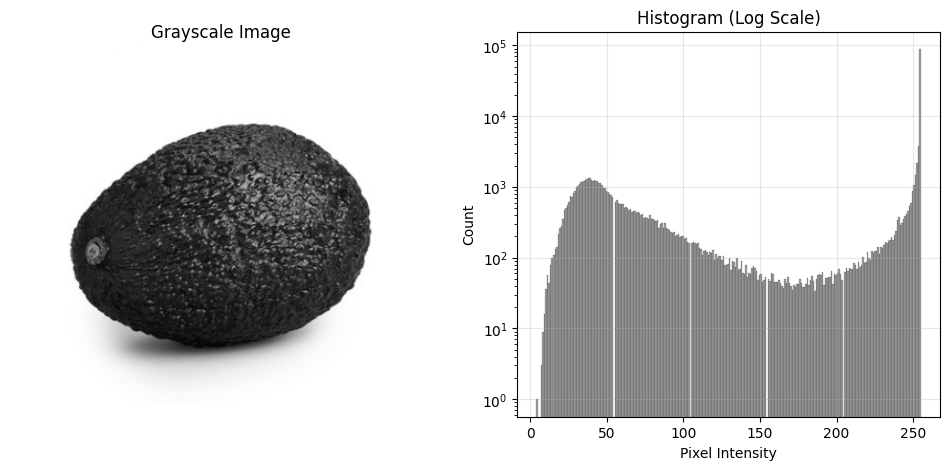

In [23]:
# Load and visualize 'avocado.png' in grayscale and inspect its histogram.
# Inspect the minimum and maximum pixel values
#    Ex.: np.min(img) and np.max(img)
# Plot the histogram of pixel intensities
# Given the histogram, decide where you would place a manual threshold to separate the avocado from the background

img = cv2.imread(images_path + 'avocado.png', cv2.IMREAD_GRAYSCALE)

if img is None:
    sys.exit('Input image not found, check the path')

print('Min and max pixel value =', np.min(img), ',', np.max(img))

# Visualize the image and the histogram side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot Image
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Grayscale Image')
ax[0].axis('off')

# Plot Histogram
sns.histplot(img.reshape(-1), bins=256, ax=ax[1], color='gray')
ax[1].set_xlabel('Pixel Intensity')
ax[1].grid(True, alpha=0.3)
plt.yscale('log')  # <--- ADD THIS
plt.title('Histogram (Log Scale)')
plt.show()


Otsu's thresholding

Estimated optimal threshold = 153.0


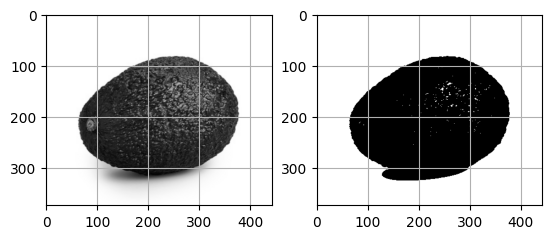

In [21]:
threshold, thresholded_img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
print('Estimated optimal threshold =', threshold)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(thresholded_img, cmap='gray')
plt.show()

1. i applied a log scale for the histogram to better see the bimodal distribution
2. the manual teshold would be around 150 or 160 intensity, its where the valley is situated in the histogram
3. the optimal treshold is 153 

**Exercise 4 (0.05):**
Read and visualize the image 'CT.png', and:
1. Inspect the intensity distribution of the pixels.
1. What intensity threshold would you use to segment the lungs?
1. Try to segment the lungs using the Otsu method.
   What is the estimated optimal threshold?

Min and max pixel value =  0 , 198


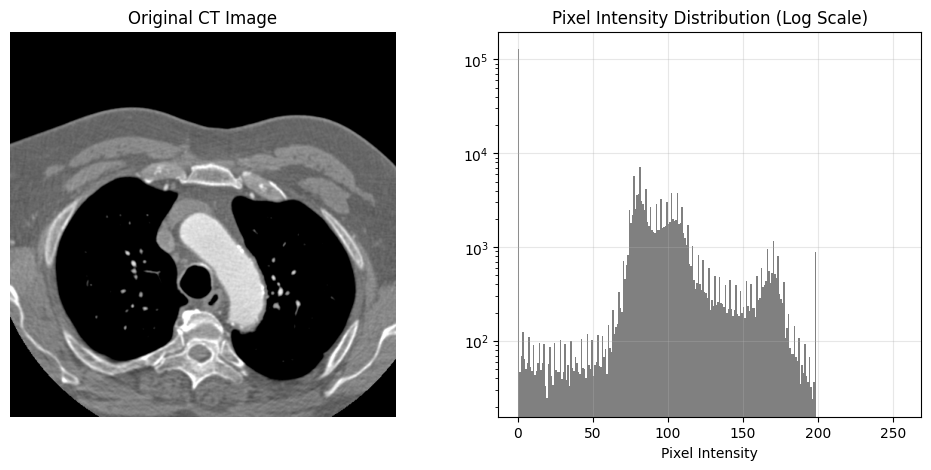

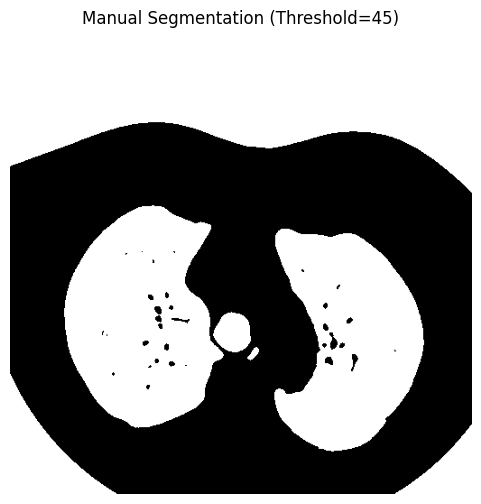

In [29]:
#Inspect the intensity distriibution of 'CT.png'
#Propose a manual threshold for segmenting the lungs based on the histogram
#Apply it and visualize the result

img = cv2.imread(images_path + 'CT.png', cv2.IMREAD_GRAYSCALE)
if img is None:
  sys.exit('Input image not found, check the path')

print('Min and max pixel value = ', np.min(img), ',' , np.max(img))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original CT Image')
ax[0].axis('off')

ax[1].hist(img.reshape(-1), bins=256, range=[0, 256], color='gray')
ax[1].set_yscale('log')
ax[1].set_title('Pixel Intensity Distribution (Log Scale)')
ax[1].set_xlabel('Pixel Intensity')
ax[1].grid(True, alpha=0.3)
plt.show()

manual_thr = 45

_, manual_seg = cv2.threshold(img, manual_thr, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(6, 6))
plt.imshow(manual_seg, cmap='gray')
plt.title(f'Manual Segmentation (Threshold={manual_thr})')
plt.axis('off')
plt.show()

Otsu's thresholding

Estimated optimal threshold (Otsu) = 51.0


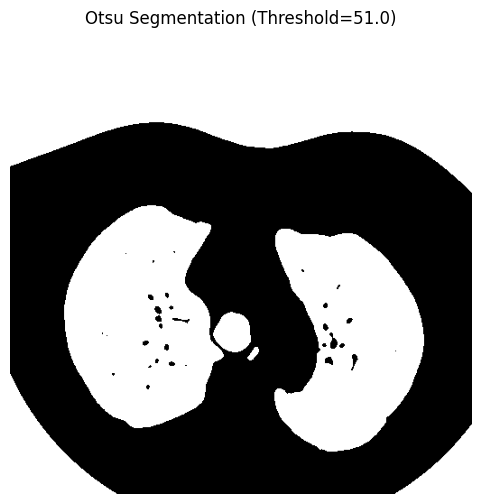

In [28]:
otsu_val, otsu_seg = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

print(f"Estimated optimal threshold (Otsu) = {otsu_val}")

plt.figure(figsize=(6, 6))
plt.imshow(otsu_seg, cmap='gray')
plt.title(f'Otsu Segmentation (Threshold={otsu_val})')
plt.axis('off')
plt.show()


Based on the histogram i picked a treshold of 45. the otsu optimal is 51. diferences are minimal. 

**Exercise 5 (0.10 pts):** Using the auxiliary functions provided next:
1. Apply the Gaussian Mixture Model (GMM) method
   (e.g. the implementation in scikit-learn)
   to 'CT.png' to segment **other parts** of the image.
   First exclude the background and the lungs
   and try different number of Gaussians.
1. Would it be possible to additionally segment the bones (whitest parts)? Explain how.

**Key Concepts**

***Gaussian Mixture Model (GMM)***:
A Gaussian Mixture Model is a probabilistic model
that assumes all data points are generated from a mixture of
a finite number of Gaussian distributions with certain parameters.

Some helper functions we use later.

In [30]:
def fit_GMM(img, nb_gaussians, plot_stds=False):
  """ Fit GMM given the desired number of Gaussians. """

  gmm = mixture.GaussianMixture(n_components=nb_gaussians, max_iter=1000, covariance_type='full', random_state=1).fit(img.reshape(-1, 1))
  ordered_mu, ordered_std, ordered_pi, order = find_GMM_statistics(gmm)
  gaussian_colors = ['b','g','r','c','m','y']    # max 6 gaussians, add more if necessary
  print('Means = ', ordered_mu)
  print('Stds = ', ordered_std)
  print('Pis = ', ordered_pi)
  for i in range(nb_gaussians):
    plot_gaussian_and_stds(np.array([np.min(img), np.max(img)]), ordered_mu[i], ordered_std[i], ordered_pi[i], gaussian_colors[i], plot_stds, alpha=0.8)

  return gmm, ordered_mu, ordered_std, ordered_pi, order

def find_GMM_statistics(gmm):
  """ Determine which one is the first (lower mean),
      the second, the third, etc.  Gaussian to consistently color
      them in the plots,
      visualize the masks, etc. """

  all_means = np.array(gmm.means_[:, 0]).flatten()
  all_covariances = gmm.covariances_.flatten()

  order = np.argsort(all_means)  # this is also the label of clusters, return also 'order', useful to modify the cluster's label if necessary
  ordered_mu = all_means[order]
  ordered_std = np.sqrt(all_covariances[order])
  ordered_pi = gmm.weights_[order]

  return ordered_mu, ordered_std, ordered_pi, order

def plot_gaussian_and_stds(gaussians_range, mu, std, pi, color, plot_stds=False, alpha=1):
  """ Plot the Gaussian given by mu, std and pi.
      If plot_stds, additionally plot vertical lines corresponding to
      +-1SD, +-2SD, +-3SD """

  xmin, xmax = gaussians_range
  x = np.linspace(xmin, xmax, 1000)
  p = norm.pdf(x, mu, std) * pi
  if plot_stds:
      # plt.axvline(mu + std, 0, 1, label='pyplot vertical line', c=color)
    plt.axvline(mu + std, 0, 1, c=color, ls='--', alpha=0.75)
    plt.axvline(mu - std, 0, 1, c=color, ls='--', alpha=0.75)

    plt.axvline(mu + 2 * std, 0, 1, c=color, ls='-.', alpha=0.5)
    plt.axvline(mu - 2 * std, 0, 1, c=color, ls='-.', alpha=0.5)

    plt.axvline(mu + 3 * std, 0, 1, c=color, ls=':', alpha=0.25)
    plt.axvline(mu - 3 * std, 0, 1, c=color, ls=':', alpha=0.25)

    plt.plot(x, p, color, linewidth=2, alpha=alpha,
      label="Mean = {:.2f}; STD = {:.2f}; Weight = {:.2f}".format(mu, std, pi))

Means =  [ 0.         98.01459654]
Stds =  [1.00000000e-03 3.22300677e+01]
Pis =  [0.66329405 0.33670595]


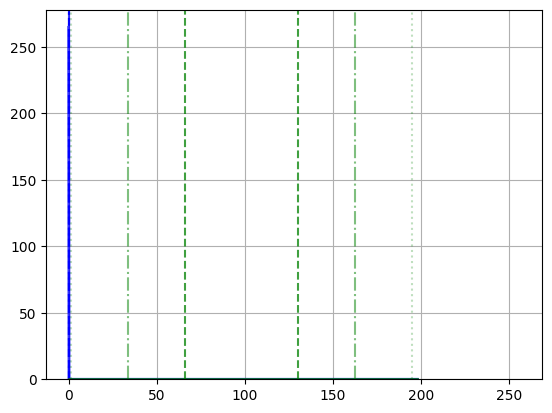

Means =  [  0.          88.06644761 166.57663669]
Stds =  [1.00000000e-03 1.97418048e+01 1.13603936e+01]
Pis =  [0.66329416 0.29404119 0.04266465]


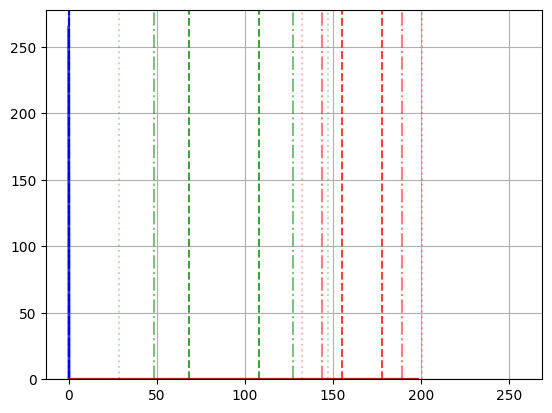

Means =  [  0.          85.83298041 106.65996245 166.15825235]
Stds =  [1.00000000e-03 1.95005277e+01 4.68804537e+00 1.17476598e+01]
Pis =  [0.66329416 0.2637267  0.02958804 0.0433911 ]


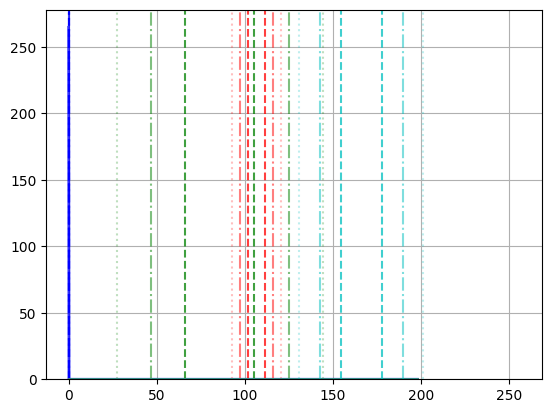

In [31]:
other_colors = img[np.where(thresholded_img==255)]      # exclude background and lungs
plt.hist(other_colors.reshape(-1), bins=256, range=[0, 256], density=True)    # density for probability density instead of total count

gmm, ordered_mu, ordered_std, ordered_pi, order=fit_GMM(other_colors, nb_gaussians=2, plot_stds=True)
plt.show()

plt.figure()
plt.hist(other_colors.reshape(-1), bins=256, range=[0, 256], density=True)
gmm, ordered_mu, ordered_std, ordered_pi, order=fit_GMM(other_colors, nb_gaussians=3, plot_stds=True)
plt.show()

plt.figure()
plt.hist(other_colors.reshape(-1), bins=256, range=[0, 256], density=True)
gmm, ordered_mu, ordered_std, ordered_pi, order=fit_GMM(other_colors, nb_gaussians=4, plot_stds=True)
plt.show()

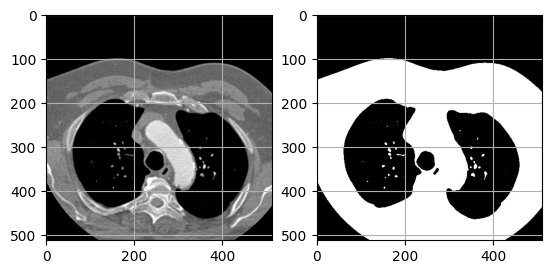

In [32]:
threshold = 50

mask = np.zeros_like(img)
mask[np.where(img > threshold)] = 1

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(mask, cmap='gray')
plt.show()

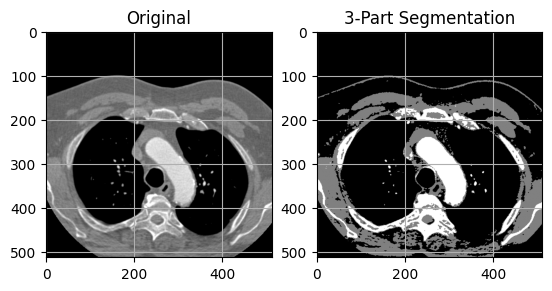

In [39]:
threshold1 = 90 
threshold2 = 121  

mask = np.zeros_like(img)
mask[(img >= threshold1) & (img < threshold2)] = 1

mask[img >= threshold2] = 2

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(mask, cmap='gray', vmin=0, vmax=2)
ax[1].set_title("3-Part Segmentation")
plt.show()

its posible to detect more parts from the ct image. applying differente tresholds we can detect more "parts" of the image. with 2 values selected we can split the image intro 3 sections. with some more fine-tuning we could split it into air, bone and soft tissue.

#### Clustering

**Exercise 6 (0.05 pts):** Using 'CT.png':
1. Try **several times** k-means specifying a different number of clusters.
1. What differences, if any, do you observe between each run?

**Key Concepts**

***K-means***: K-means is an iterative clustering algorithm
that groups similar data points together
based on their distance to a central point, called the centroid.
The centroids represents the centers of the clusters
and are calculated as the means (or medians) of the points in the cluster.

We use the functions as imported from the scikit-learn library.

Define a convenience function to compute and show the k-means results.

In [40]:
def RunKMeans(img,k):
  kmeans = KMeans(n_clusters=k, n_init="auto").fit(img.reshape(-1, 1))
  fig, ax = plt.subplots(1, 2)
  ax[0].imshow(img, cmap='gray')
  ax[1].imshow(kmeans.labels_.reshape(img.shape))
  # plot image + labels overlayed
  plt.figure()
  plt.imshow(img, cmap='gray')
  plt.imshow(kmeans.labels_.reshape(img.shape), alpha=0.2)
  plt.colorbar()
  plt.show()

Run 1

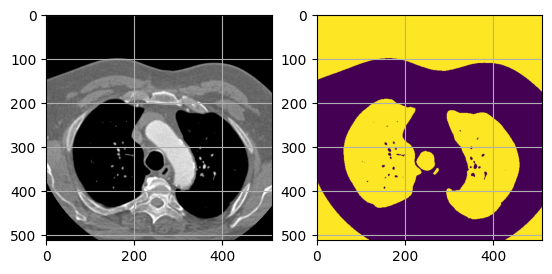

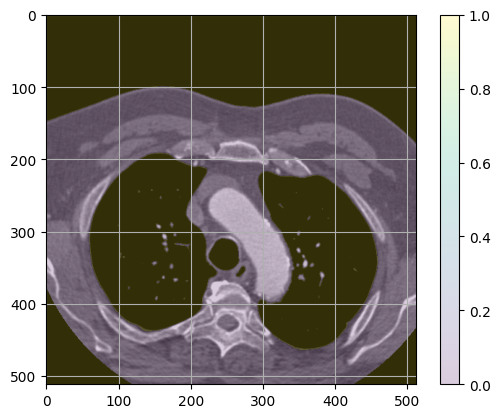

In [44]:
RunKMeans(img, 2)

Run 2

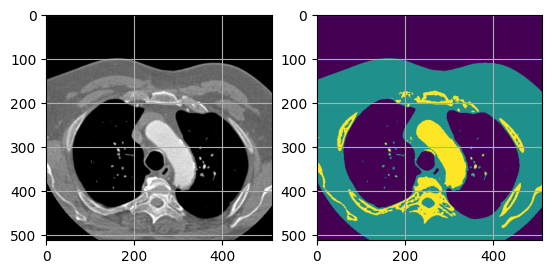

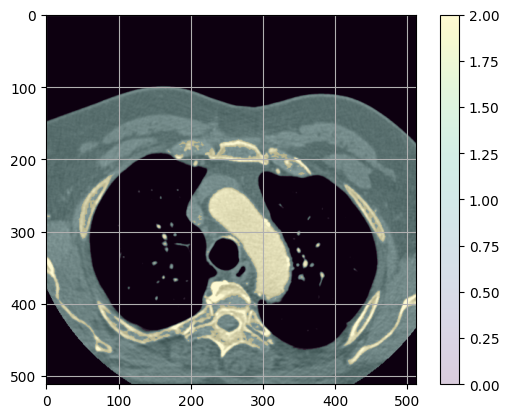

In [45]:
RunKMeans(img, 3)

Run 3

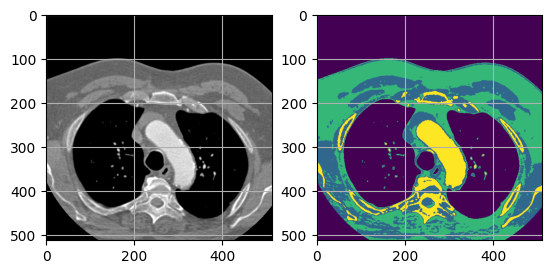

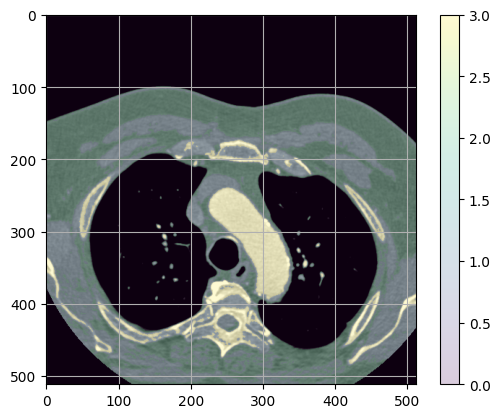

In [46]:
RunKMeans(img, 4)

Each run separates the image into more sections. when K is 2 we split it between with and dark. and as we up the K, more sections are detected. 

**Exercise 7 (0.05 pts):**
Read and visualize 'puncher.png' and its corresponding histogram. Then:
1. Apply k-means to segment the object.
1. Apply Meanshift to segment the object. Try different 'bandwidth' values.

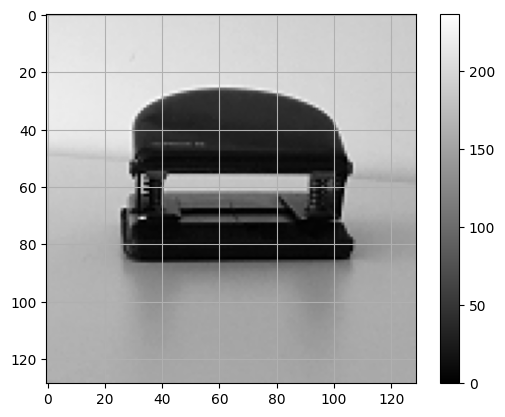

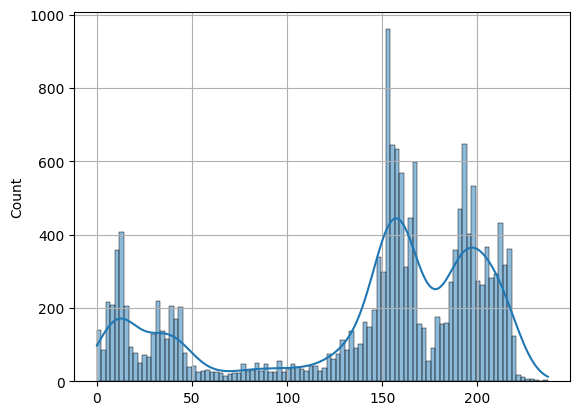

In [47]:
img = cv2.imread(images_path + 'puncher.png', cv2.IMREAD_GRAYSCALE)
if img is None:
  sys.exit('Input image not found, check the path')

plt.imshow(img, cmap='gray')
plt.colorbar()
plt.figure()
sns.histplot(img.reshape(-1), bins=100, kde=True)
plt.show()

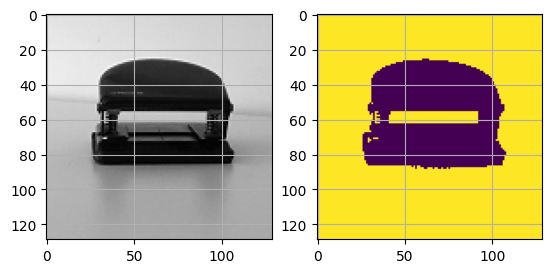

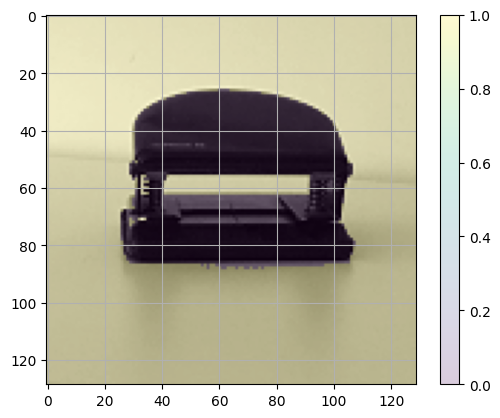

In [48]:
RunKMeans(img, 2)

Meanshift with default bandwidth (this might take some time, be patient).

Found 2 clusters


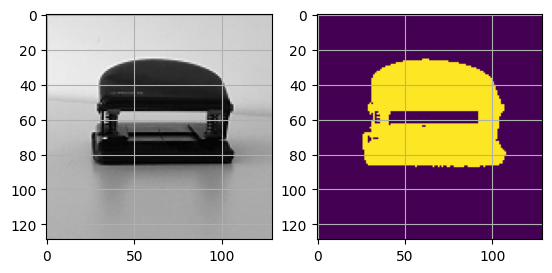

In [49]:
ms_default = MeanShift().fit(img.reshape(-1, 1))

print('Found', len(np.unique(ms_default.labels_)), 'clusters')
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(ms_default.labels_.reshape(img.shape))
plt.show()

Meanshift with different bandwidths.
We first define a convenience function to run experiments more easily.

In [50]:
def RunMeanShift(img, bw):
  ms = MeanShift(bandwidth=bw).fit(img.reshape(-1, 1))
  print('Found', len(np.unique(ms.labels_)), 'clusters')
  fig, ax = plt.subplots(1, 2)
  ax[0].imshow(img, 'gray')
  ax[1].imshow(ms.labels_.reshape(img.shape))
  plt.show()

Found 8 clusters


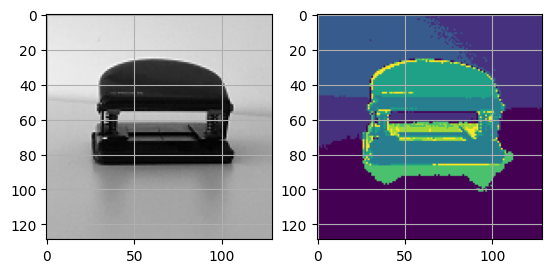

In [51]:
# Using the RunMeanShift function defined above, run MeanShift with at least two different bandwidth values (e.g. 5, 10, 20)

RunMeanShift(img, 10)

Found 5 clusters


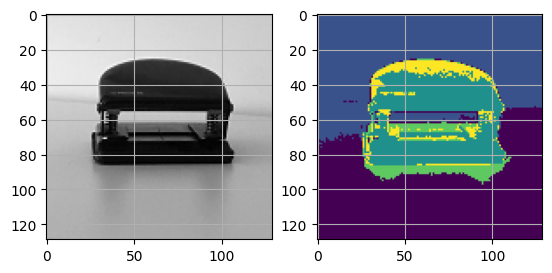

In [52]:
RunMeanShift(img, 20)

**Exercise 8 (0.25 pts):**
Now we work with an example that uncovers some of the short-commings
of the methods seen so far. Our goal is to separate the foreground
of a not so well taken photograph of a sudoku game.
Naturally, we consider as foreground the numbers and the gridlines.

In [53]:
img = cv2.imread(images_path + 'sudoku.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
  sys.exit('Input image not found, check the path')

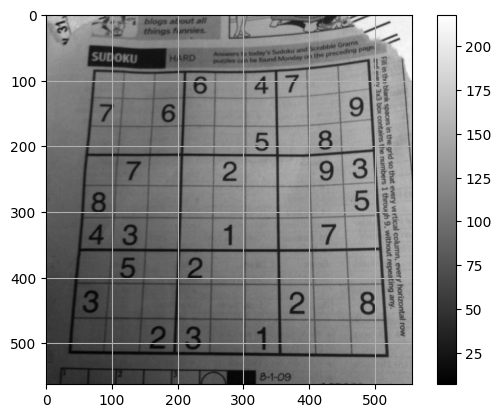

In [54]:
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

We calculate the histogram and visualize it using matplotlib and pyplot.


We do the same using the “seaborn” package.

We compute a smoothed version of the histogram using KDE from the
“seaborn” package.

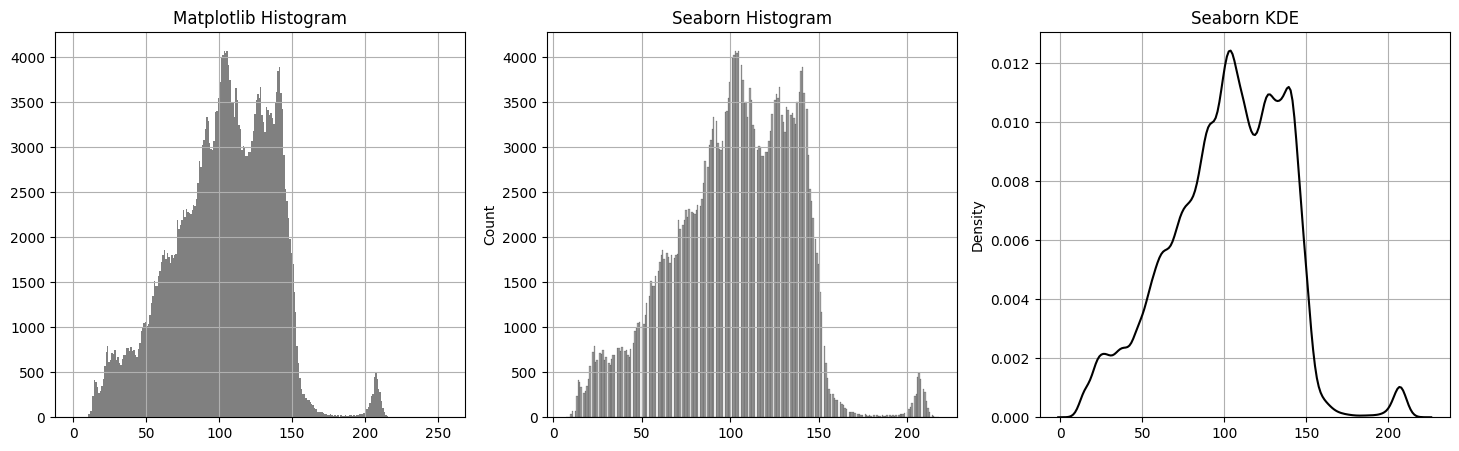

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Matplotlib Histogram
ax[0].hist(img.reshape(-1), bins=256, range=[0, 256], color='gray')
ax[0].set_title('Matplotlib Histogram')

# Seaborn Histogram
sns.histplot(img.reshape(-1), bins=256, color='gray', ax=ax[1])
ax[1].set_title('Seaborn Histogram')

# Seaborn KDE (Smoothed)
sns.kdeplot(img.reshape(-1), color='black', ax=ax[2])
ax[2].set_title('Seaborn KDE')

plt.show()

Apply global thresholding to 'sudoku.jpg'.
Can you find a number of levels to separate the foreground
(i.e. the numbers and the gridlines)?

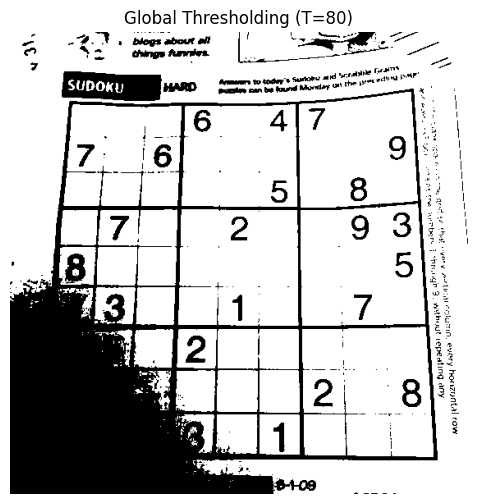

In [64]:
# Try to find a manual threshold (e.g., 100)
# You will likely notice that one side of the image gets fixed while the other fails.
manual_thresh = 80
_, global_seg = cv2.threshold(img, manual_thresh, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6, 6))
plt.imshow(global_seg, cmap='gray')
plt.title(f'Global Thresholding (T={manual_thresh})')
plt.axis('off')
plt.show()


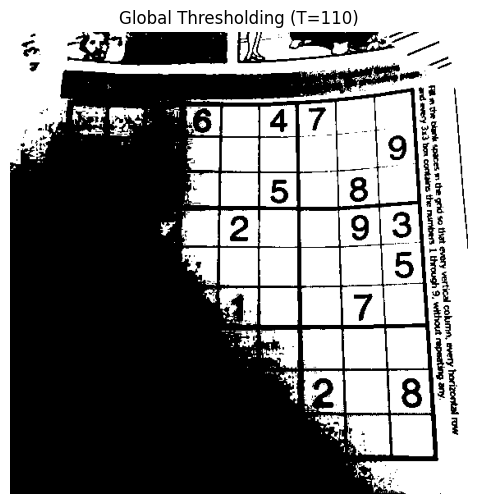

In [65]:
# Try to find a manual threshold (e.g., 100)
# You will likely notice that one side of the image gets fixed while the other fails.
manual_thresh = 110
_, global_seg = cv2.threshold(img, manual_thresh, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6, 6))
plt.imshow(global_seg, cmap='gray')
plt.title(f'Global Thresholding (T={manual_thresh})')
plt.axis('off')
plt.show()


Let's try Otsu's thresholding.

Otsu's optimal threshold: 97.0


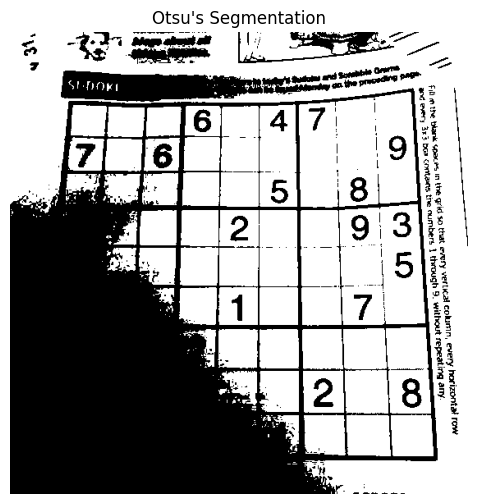

In [66]:
otsu_val, otsu_seg = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(f"Otsu's optimal threshold: {otsu_val}")

plt.figure(figsize=(6, 6))
plt.imshow(otsu_seg, cmap='gray')
plt.title(f"Otsu's Segmentation")
plt.axis('off')
plt.show()

How do you rate the performance of Otsu's thresholding?

it does a decent job spliting the cells from the background. but we cant see all cells without loosing some of the numbers in the dark parts

Let's try with Gaussian Mixture Model. What would be a good number of Gaussians to model the data?

Means =  [ 72.01057816 119.89739357]
Stds =  [27.33906986 24.46458175]
Pis =  [0.36573559 0.63426441]


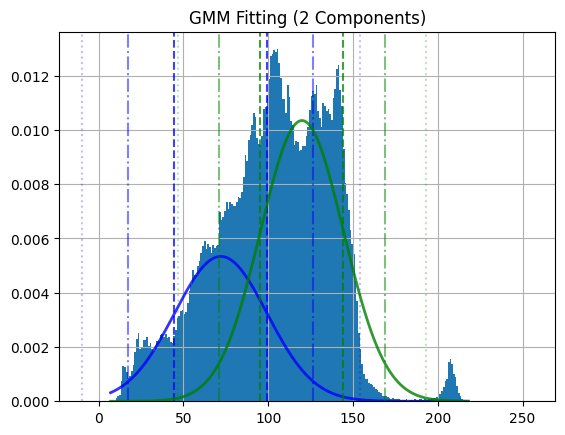

In [68]:
#YOUR CODE HERE (Exercise 5)

plt.hist(img.reshape(-1), bins=256, range=[0, 256], density=True)    # density for probability density instead of total count

fit_GMM(img, nb_gaussians=2, plot_stds=True)
plt.title("GMM Fitting (2 Components)")
plt.show()

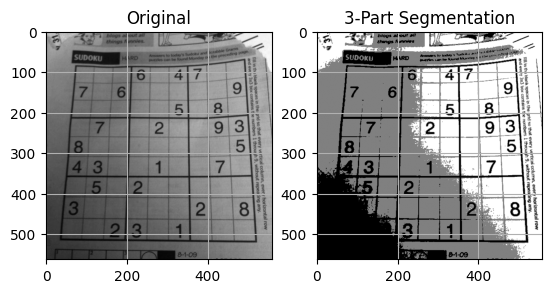

In [70]:
threshold1 = 75 
threshold2 = 121  

mask = np.zeros_like(img)
mask[(img >= threshold1) & (img < threshold2)] = 1

mask[img >= threshold2] = 2

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(mask, cmap='gray', vmin=0, vmax=2)
ax[1].set_title("3-Part Segmentation")
plt.show()

Does the GMM fit our needs here?

If we apply 2 tresholds we get to see more numbers and dont loose on some of the lines. Maybe with a higher count it could be better but we get more noise from other shades as well

Let's try with k-means. What number of clusters would you choose?

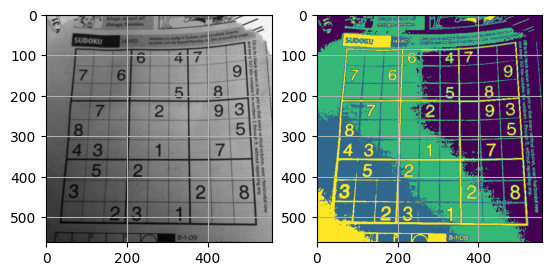

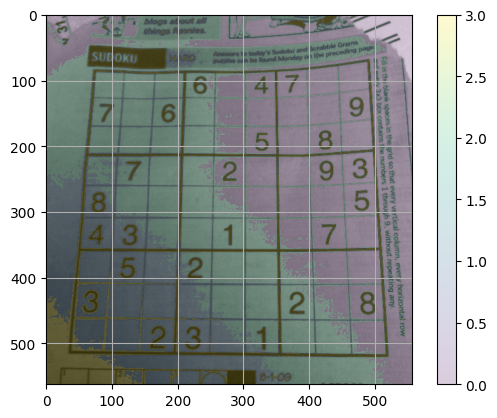

In [73]:
#Run K-means with several values of k
# Based on the reults, what number of clusters would you choose and why?
RunKMeans(img, 4)


With k = 4 we get all og the numbers, but the lines get split between different groups. there is no optimal value that does a perfect split

Let's try with meanshift.
(This might take even more time compared to above.)

Found 19 clusters


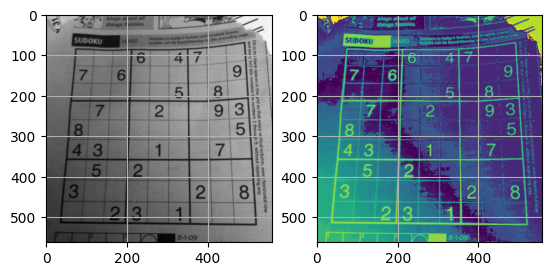

In [74]:
#Run MeanShift wirh a bandwidth of 6 and inspect the result.
RunMeanShift(img, 6)

How do these two methods handle the problem?

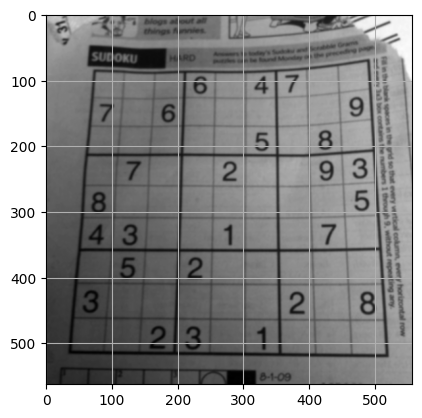

In [75]:
#Finally, try Gaussian blur and adaptative thresholding on 'sudoku,jpg'

blurred_img = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(blurred_img, cmap='gray')
plt.show()

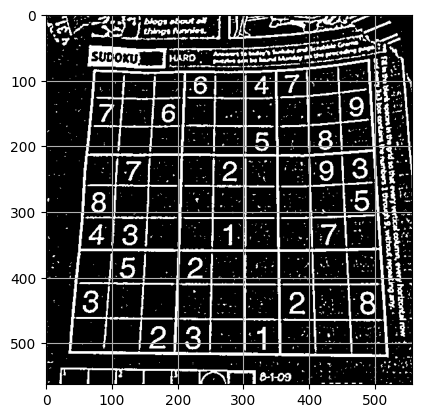

In [76]:
thresholded_img = cv2.adaptiveThreshold(blurred_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plt.imshow(thresholded_img, cmap='gray')
plt.show()

1. Argue what this type of adaptive thresholding actually does.
1. Try to improve the chosen parameters.
1. Suggest how you would proceed to segment the foreground
   we are interested in.

**Exercise 9 (0.05 pts):**
Read and visualize the image 'fieldWheat.png',
and use k-means (**with number of clusters=3**) to segment:
1. The field of wheat alone. Save the resulting image.
1. The whole sky (clear sky and clouds)

- **Note 1:** If more than 1 feature
  (e.g. 'R', 'G', and 'B' in a color image) is given,
  each feature should be given as a column.
- **Note 2:** Remember that different initializations may lead to
  different clusters.

In [ ]:
img = cv2.imread(images_path + 'field.png')      # cv2 reads it BGR order
if img is None:
  sys.exit('Input image not found, check the path')

plt.imshow(img[...,::-1])   # IMPORTANT --> matplotlib requires RGB order
plt.show()

In [ ]:
X = np.array([img[:, :, 0].reshape(-1), img[:, :, 1].reshape(-1), img[:, :, 2].reshape(-1)]).T
print(X.shape)

In [ ]:
#  - Apply K-means with k = 3 to the RGB pixels in X.
#  - Reshape the labels to the image shape and visualize the cluster map.
#  - Overlay the clustering result on the original image.
#  - Inspect the cluster centers and decide which cluster corresponds to:
#       - The wheat field
#       - The sky (clear sky + clouds)
#       - Any remaining region


# YOUR CODE HERE
# Example steps (to be implemented by you):
# kmeans = KMeans(n_clusters=??, n_init="auto").fit(??)
# kmeans_labels = kmeans.labels_.reshape([img.shape[0], img.shape[1]])
# ...
#print(kmeans.cluster_centers_)


**Exercise 10 (0.15 pts): Density-based clustering**
1. Load 'matrix2.dat' data (data generated with 1 run of the code showed next. Note that each run will produce a different dataset. This is why we provide the file matrix2.dat, but you can generate different datasets and see how the clustering algorithm works on different situations).
1. Apply DBSCAN to segment the custers you observe.

In [ ]:
# Code to generate a new dataset

# 2 clusters + noise
# X = np.concatenate((
#     np.random.normal(0, 10, (50, 2)),    # loc, scale, size. This one, noise-like
#     np.random.normal(3, 1, (250, 2)),
#     np.random.normal(10, 1, (400, 2))))

# 3 clusters + noise
# X = np.concatenate((
#     np.random.normal(0, 10, (50, 2)),    # loc, scale, size. This one, noise-like
#     np.random.normal(3, 1, (250, 2)),
#     np.random.normal(10, 1, (400, 2)),
#     np.random.normal(-10, 2, (100, 2))))
# # save it
# X.dump("other_matrix.dat")

In [ ]:
X = np.load("matrix2.dat", allow_pickle=True)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Data")
plt.show()

First, let's see what k-means can do... You may need to adjust the number of clusters in the code.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].scatter(X[:, 0], X[:, 1])
ax[0].set_title("Data")

ax[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels)
ax[1].set_title("K Means Clustering")
plt.show()

Now, let's apply density-based clustering with DBSCAN to see if we can improve the results.

In [ ]:
clustering1 = DBSCAN().fit(X)      # default eps = 0.5, min_samples=5
print('Found', len(np.unique(clustering1.labels_))-1, 'clusters:', np.unique(clustering1.labels_))

clustering2 = DBSCAN(eps=3, min_samples=3).fit(X)
print('Found', len(np.unique(clustering2.labels_))-1, 'clusters:', np.unique(clustering2.labels_))

your bet:

In [ ]:
# Choose values for eps and min_samples that you think might detect only the clearest clusters in the data.
# Fit DBSCAN with your parameters.
# Compare your results with clustering1 and clustering2 in a single figure



Do you have any idea how we might automize the search for good
DBSCAN parameters that match our expectations?